<a href="https://colab.research.google.com/github/Namesakenberg/Deep_Learning/blob/main/dropout_layers_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Regression Data

In [ ]:
X_train = np.linspace(-1, 1, 20)

In [ ]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  ,
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475,
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [ ]:
X_test = np.linspace(-1, 1, 20)

In [ ]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

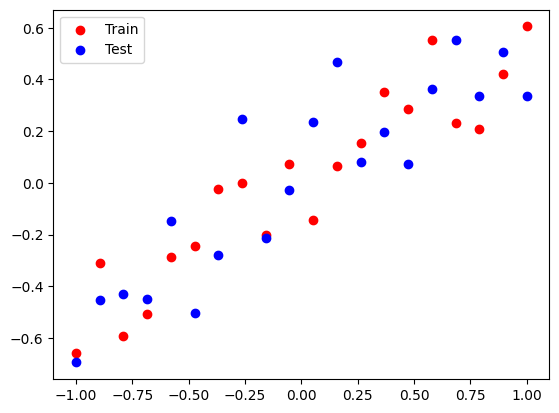

In [ ]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.show()

In [ ]:
ini

# Model_training 1 : training dense neural network that will overfit

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()
model.add(Dense(128 ,input_dim=1 ,activation='relu'))
model.add(Dense(128 , activation='relu'))
model.add(Dense(1,activation='linear'))

model.compile(optimizer = "Adam" , loss = 'mean_squared_error' , metrics= ['mse'])


history = model.fit(X_train , y_train  ,validation_data = (X_test , y_test),epochs = 500)

Epoch 1/500


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1123 - mse: 0.1123 - val_loss: 0.1053 - val_mse: 0.1053
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.0918 - mse: 0.0918 - val_loss: 0.0875 - val_mse: 0.0875
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0742 - mse: 0.0742 - val_loss: 0.0727 - val_mse: 0.0727
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0605 - val_mse: 0.0605
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0476 - mse: 0.0476 - val_loss: 0.0510 - val_mse: 0.0510
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0439 - val_mse: 0.0439
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0313 - mse: 0.0313 - val_loss: 0.0391 - val_mse: 0.0391
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 0.0265 - mse: 0.0265 - val_loss: 0.0360 - val_mse: 0.0360
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0235 - mse: 0.0235 - va

In [ ]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


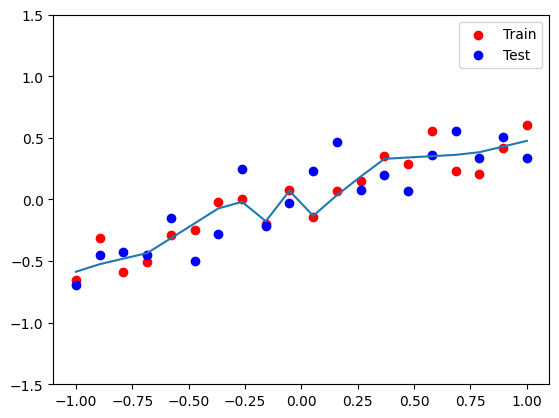

In [ ]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test , y_pred))

0.7283617015121657


In [ ]:
# clear overfitting can be seen

# model_training 3: adding dropout layers to reduuce overfitting

In [ ]:
from tensorflow.keras.layers import Dropout

model2 = Sequential()
model2.add(Dense(128 ,input_dim=1 ,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(128 , activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1,activation='linear'))

model2.compile(optimizer = "Adam" , loss = 'mean_squared_error' , metrics= ['mse'])


history = model2.fit(X_train , y_train  ,validation_data = (X_test , y_test),epochs = 500)

Epoch 1/500


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1466 - mse: 0.1466 - val_loss: 0.1172 - val_mse: 0.1172
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.1210 - mse: 0.1210 - val_loss: 0.1012 - val_mse: 0.1012
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.0913 - mse: 0.0913 - val_loss: 0.0869 - val_mse: 0.0869
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.0746 - mse: 0.0746 - val_loss: 0.0747 - val_mse: 0.0747
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.0618 - mse: 0.0618 - val_loss: 0.0644 - val_mse: 0.0644
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.0637 - mse: 0.0637 - val_loss: 0.0554 - val_mse: 0.0554
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0599 - mse: 0.0599 - val_loss: 0.0482 - val_mse: 0.0482
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 0.0443 - mse: 0.0443 - val_loss: 0.0425 - val_mse: 0.0425
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0361 - mse: 0.0361 - v

In [ ]:
y_pred2 = model2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


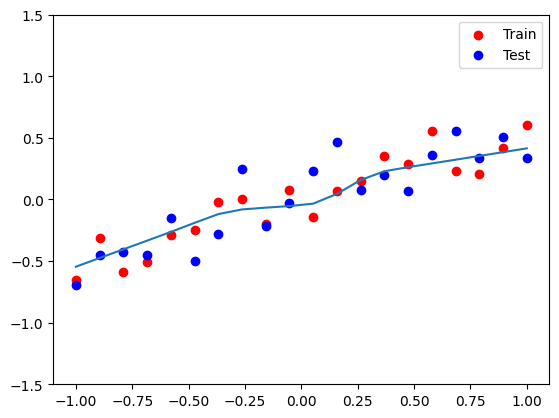

In [ ]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

In [ ]:
print(r2_score(y_test , y_pred2))

0.7567286496265727


In [ ]:
# model 2 : retrained

In [ ]:
# using callbacks


Epoch 1/3500


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1707 - mse: 0.1707 - val_loss: 0.1290 - val_mse: 0.1290
Epoch 2/3500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.1226 - mse: 0.1226 - val_loss: 0.1114 - val_mse: 0.1114
Epoch 3/3500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.1001 - mse: 0.1001 - val_loss: 0.0956 - val_mse: 0.0956
Epoch 4/3500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.0791 - mse: 0.0791 - val_loss: 0.0822 - val_mse: 0.0822
Epoch 5/3500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0640 - mse: 0.0640 - val_loss: 0.0707 - val_mse: 0.0707
Epoch 6/3500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0834 - mse: 0.0834 - val_loss: 0.0609 - val_mse: 0.0609
Epoch 7/3500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.0697 - mse: 0.0697 - val_loss: 0.0531 - val_mse: 0.0531
Epoch 8/3500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.0701 - mse: 0.0701 - val_loss: 0.0472 - val_mse: 0.0472
Epoch 9/3500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0429 - mse: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


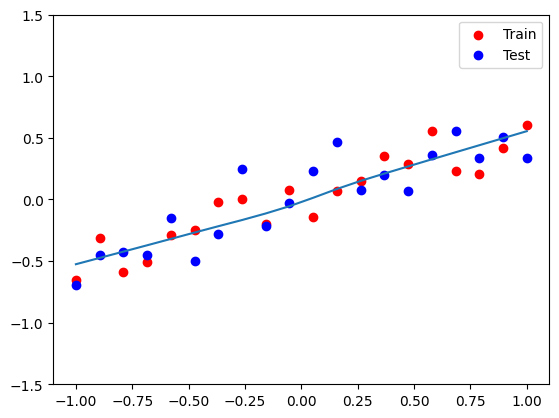

In [ ]:
model1 = Sequential()
model1.add(Dense(128, activation='relu', input_dim=1))
model1.add(Dropout(0.5))
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation='linear'))

model1.compile(optimizer="Adam", loss='mean_squared_error', metrics=['mse'])

callback = EarlyStopping(
    monitor="val_loss",
    min_delta=1e-5,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

model1.fit(
    X_train, y_train,
    callbacks=[callback],
    validation_data=(X_test, y_test),
    epochs=3500
)

y_pred1 = model1.predict(X_test)
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred1)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

In [ ]:
print(r2_score(y_test , y_pred1))

0.7722678243878185
